In [1]:
from scipy import stats
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
from matplotlib import colors
from IPython.display import Image

# PROBABILITY DISTRIBUTIONS  & RANDOM NUMBERS

## Sample mean and variance of given data 

In [17]:
data= [1.7954749844952811, -0.82344065038249903, -0.2192039195121927, 0.43421078851339012, -1.3937260553671886, 0.85161210073274862, -2.6686243950360145, -0.35207951288551514, -0.10940076133160911, -0.59905215298171999, -1.9077435365842492, 0.020406556867819687, -1.2667957796625413, -0.89430991460718678, 1.8038278417226581, 0.22364484431918985, 0.24387840765089427, 0.16074727588740503, -0.60364894979460193, 0.88708395065341128, 0.59160454172753119, 0.69199479160946198, 1.0520703481037412, 0.50795459134774568, 1.5768791411906093, 0.11136128559501068, 0.96834991062732267, -1.0799223246865801, -0.77406582026005244, -0.30040067363629003, 1.2377561077782491, -0.99824929203421076, -0.02168098535073721, -1.0387804686170952, -0.58153332350166953, -0.88398216313031486, 0.98199801462526692, -0.65395591277809428, 1.188250840837731, 0.058226502477458669, 0.96105869074830363, 0.10567619147859778, 0.51881996330412861, -1.707076404292295, 0.18157283917332023, -0.33912688245307337, 1.2734418824757954, -0.51695460401269733, -0.20360790850843452, 0.31856140595590027, 0.75735145577200225, 3.0430689558832995, 0.47146356276179396, 1.1383428598945147, 1.7429250016207152, -1.2014904270011244, 0.56068261948182707, 1.4736754494886215, 0.30054000076482723, 0.46517586287895907, -0.18897799002118684, -0.21664647047151026, 0.65038476271826817, -1.2619505543431326, 0.06505573549326088, 0.69393228967205012, -1.9606057368685155, -0.56673063268424828, -0.068754682043091431, -0.30525992662681395, -2.1195784329855063, -0.14774360361720879, 0.83612496345549592, -0.59503981572338716, -0.99505845969486162, 0.48399819526397336, 0.50755656012655292, -0.3764647961265693, -0.036037664799445097, -1.0056478038593424, -0.32747779322900994, 0.25654288021891763, -0.76614113585673627, -0.63801666019907732, 1.9661880283890789, -0.66627731259491163, -0.90671980413027353, -2.9151271617469758, 1.1026698881419355, 0.29541153460103858, 2.2523317145660862, -0.93489202353580836, 0.22350292567728611, 2.433675833153746, -1.8417520331375354, 0.90279416703884552, 1.0431742286998438, 0.68114918105219224, 0.76849076134294891, 0.4715201798721444]

In [20]:
print('data length =',len(data))

data length = 100


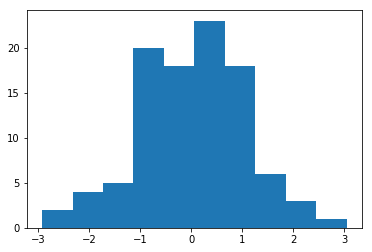

In [28]:
plt.hist(data,bins=10)
plt.show()

In [21]:
print('sample mean =',np.mean(data))
print('sample standard deviation =',np.std(data))

sample mean = 0.0435444008523
sample standard deviation = 1.06960666814


## Some properties of popular distributions

### a) Gaussian

$$
x\sim {\cal N}(\mu,\sigma) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left\{-\frac{(x-\mu)^2}{2\sigma^2}\right\} 
$$

In [38]:
f = lambda x:stats.norm.pdf(x,0,1)

In [45]:
result, error=integrate.quad(f,-np.inf,np.inf)
print('result = ',result,', error = ',error)

result =  0.9999999999999998 , error =  1.0178191320905743e-08


In [48]:
integrand=lambda x: f(x)*x
mean,error=integrate.quad(integrand,-np.inf,np.inf)
print('mean = ',mean,', integ. error = ',error)

mean =  0.0 , integ. error =  0.0


In [51]:
integrand=lambda x: (x-mean)**2 *f(x)
variance,error=integrate.quad(integrand,-np.inf,np.inf)
print('variance = ',variance,', integ. error = ',error)

variance =  1.000000000000001 , integ. error =  5.274099954078797e-09


### b) Bernoulli
$$
k\sim {\rm Bern}(p) = p^k (1-p)^{1-k}
$$

In [61]:
P = lambda k: stats.bernoulli.pmf(k,0.3)

In [63]:
P(0)+P(1)

1.0

### c) generalised Bernoulli
$$
m\mapsto {\bf t} \sim {\rm gBern}({\bf p}) = \prod_{k=1}^K p_k^{t_k} 
$$
where the common procedure is to map the multiclass variable $m$ in a vector variable ${\bf t}$
according to the "1-to-K" coding scheme

In [576]:
K=3  # number of classes
p_1 = 0.2
p_2 = 0.5
p_3 = 1 - p_1 - p_2
p = [p_1,p_2,p_3]
gBern = lambda t,p: np.prod(np.array(p)**t)    

In [75]:
# 1-to-K coding scheme
gBern([0,0,1],p)

0.30000000000000004

In [93]:
# expected value, E[t|p]
terms=[]
for i in range(len(p)):
    t1=max(0,1-i)
    t2=min(i,2-i)
    t3=1-t1-t2
    t=np.array([t1,t2,t3])
    terms.append(gBern(t,p)*t[i])
print(terms)

[0.20000000000000001, 0.5, 0.30000000000000004]


## Random numbers following a given distribution

In [96]:
# 10x3 matrix of random numbers. Uniform distribution [0,1)
np.random.rand(10,3)

array([[ 0.90838831,  0.89665775,  0.86017759],
       [ 0.21589999,  0.16817486,  0.43644591],
       [ 0.21548302,  0.6271486 ,  0.75250643],
       [ 0.25520359,  0.71765491,  0.97852098],
       [ 0.01775359,  0.35870639,  0.31612021],
       [ 0.25350624,  0.19733946,  0.82048409],
       [ 0.14494164,  0.95978638,  0.35367663],
       [ 0.92140519,  0.02784554,  0.17328545],
       [ 0.62982396,  0.24461005,  0.35278463],
       [ 0.80778717,  0.05845756,  0.70892942]])

In [105]:
# 100 random numbers following a normal distrib. N(mu=0,sigma=1)
Nnumbers = stats.norm.rvs(0,1,size=100)

In [106]:
print(Nnumbers)

[ 2.3861382   0.11818639 -0.20945483  0.70345407  0.17810675  0.83379049
 -0.66831612 -0.45628614 -0.64934511 -0.0476986   0.50212132  0.98244782
 -0.77728052  1.8355884  -0.80725158 -0.89117507  0.68338397 -1.25395585
 -0.52549957  0.9731651  -0.22533719 -1.7118952  -1.87034034 -1.80756724
 -0.52985225 -0.09756109  0.3736407   0.79268209 -0.77295936 -0.16535216
  0.68747188  0.95936523  1.28507113 -1.76976773  1.89443828 -0.0736477
  0.27960118 -0.02566272 -0.5312606   1.18419129  1.12820577 -0.01500064
  0.25520086  1.09190427 -0.23413191 -0.30370315  0.1959906  -0.08253727
 -0.83403286  0.18148725 -0.31369415  0.21062583 -0.48442247  2.09613499
  1.41984131  0.56265     0.53888104 -1.01171781 -0.73253031 -0.86758799
 -0.43447329 -0.52508916  0.56886953 -1.35323922  1.22125353 -0.74555315
  0.21235678  0.45920967  0.57356761 -1.74264151  1.57713494 -1.71158465
 -1.47560783  0.86437981  1.06346028  0.38401167 -0.2427776  -1.54269733
  0.84997783  1.4612463  -0.32482865  0.73268098 -0.

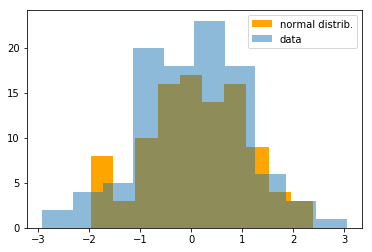

In [107]:
plt.hist(Nnumbers,bins=10,color='orange',label='normal distrib.')
plt.hist(data,bins=10,alpha=0.5,label='data')
plt.legend(bbox_to_anchor=(1.,1.))
plt.show()

In [133]:
# set a random seed, for reproducibility purposes
np.random.seed(123)

# 100 random numbers following a Poisson distrib. Pois(lambda=10)
lamb=10.0
Pnumbers = stats.poisson.rvs(lamb,size=100)

In [134]:
print(Pnumbers)

[12  7 12 10  8  9  9  7 10 11 12 12  9  8  5  9  9  9 16 11  8 14 10  6 11
  8  9 14 12 11 14 13  7 11 10  6  8 10  9  8  9 11  6  7 10  5  8 14 14  8
  8 11 15  8  7 13 12  9  9  5 16 10 12  8 12 12  9 11 11 12 13 15  5  9 11
  7 10 16  7  9 10 10 13 12 13  9  9  7 14 15 10  8  7 15 10  5 18  7 12 11]


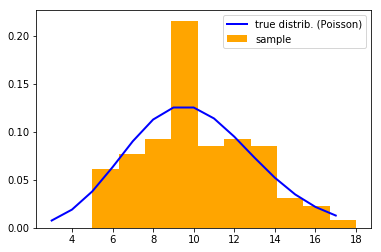

In [136]:
plt.hist(Pnumbers,label='sample',normed=1,color='orange')

n=np.arange(stats.poisson.ppf(0.01,lamb),stats.poisson.ppf(0.99,lamb))
plt.plot(n,stats.poisson.pmf(n,lamb),label='true distrib. (Poisson)', linewidth=2.0,color='blue')

plt.legend(bbox_to_anchor=(1.,1.))
plt.show()